In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Paths

In [3]:
REPORTS_PATH = "./../reports"
CSV_PATH = os.path.join(REPORTS_PATH, "model_results.csv")

# Load evaluation results

In [4]:
df = pd.read_csv(CSV_PATH)
df.head()

,Feature,Model,Accuracy,ErrorRate,Pos_Precision,Neg_Precision,Pos_Recall,Neg_Recall,Pos_F1,Neg_F1,Weighted_F1
0,tfidf_word_2gram,NaiveBayes,0.641667,0.358333,0.777778,0.555556,0.875,0.625,0.823529,0.588235,0.625003
1,tfidf_word_1gram,NaiveBayes,0.837500,0.162500,0.888889,1.000000,1.000,0.875,0.941176,0.933333,0.824923
2,tfidf_word_3gram,SVM,0.125000,0.875000,1.000000,0.400000,0.125,0.250,0.222222,0.307692,0.139715
3,tfidf_word_2gram,DecisionTree,0.183333,0.816667,0.375000,0.142857,0.375,0.250,0.375000,0.181818,0.176238
4,tfidf_word_3gram,NaiveBayes,0.358333,0.641667,0.555556,0.285714,0.625,0.500,0.588235,0.363636,0.349617


# 1. Accuracy & Error Rate by Model and Feature

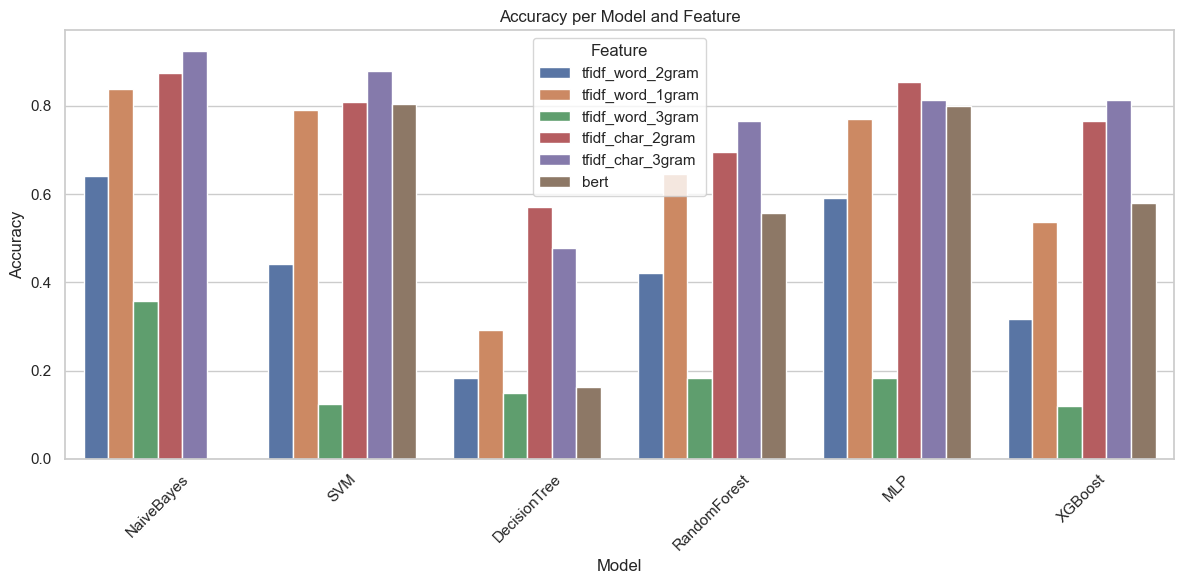

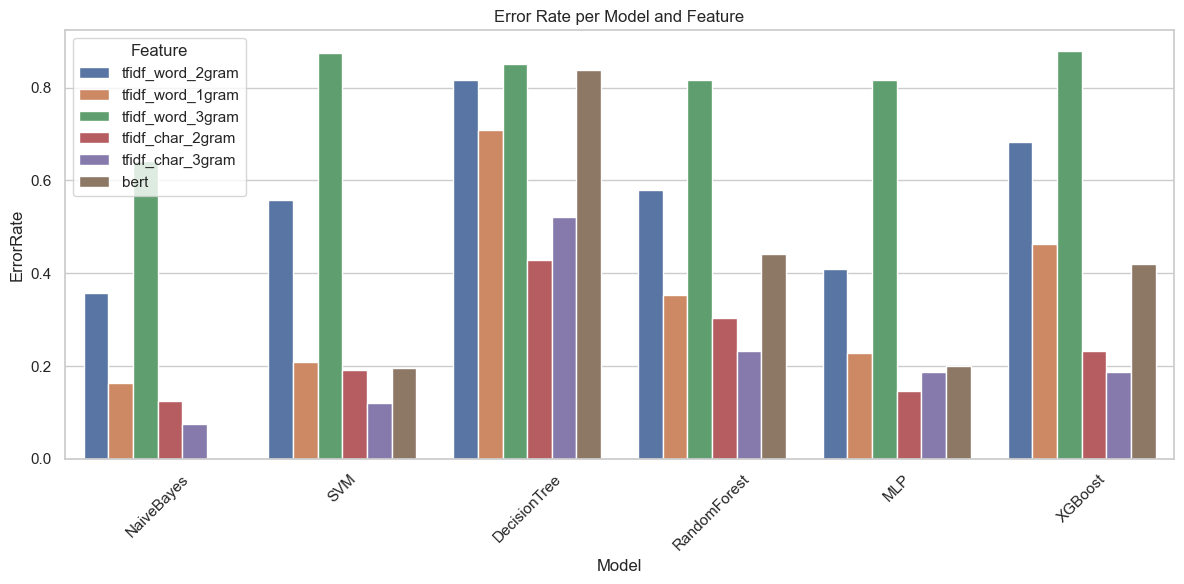

In [5]:
# Accuracy comparison
plt.figure()
sns.barplot(data=df, x="Model", y="Accuracy", hue="Feature")
plt.title("Accuracy per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/accuracy_per_model.png")
plt.show()

# Error rate comparison
plt.figure()
sns.barplot(data=df, x="Model", y="ErrorRate", hue="Feature")
plt.title("Error Rate per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/error_rate_per_model.png")
plt.show()


# 2. Weighted F1-Score

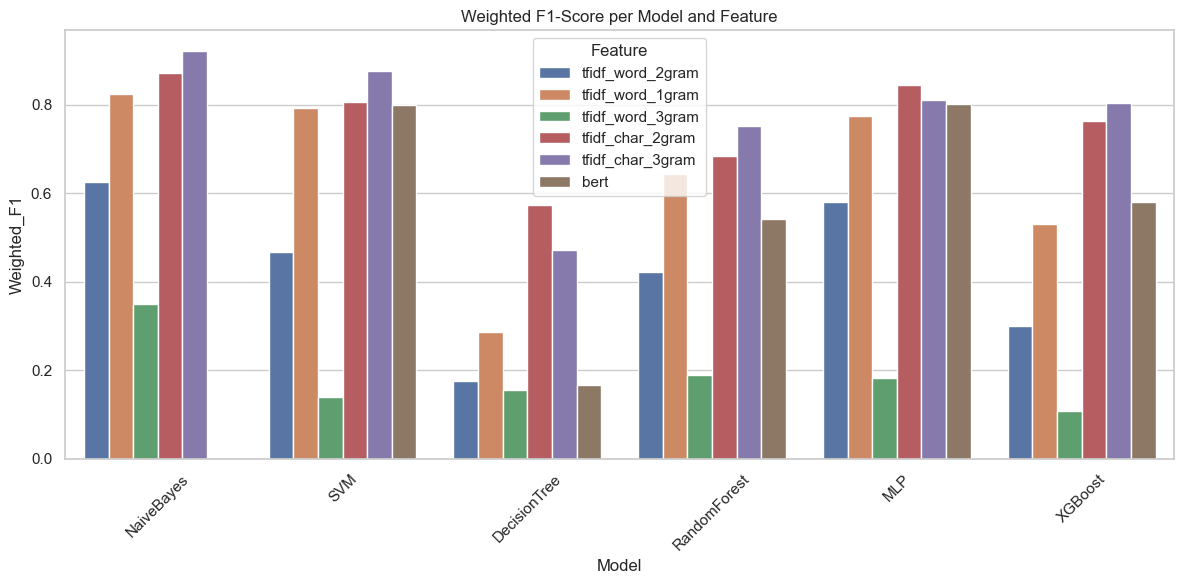

In [6]:
plt.figure()
sns.barplot(data=df, x="Model", y="Weighted_F1", hue="Feature")
plt.title("Weighted F1-Score per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/weighted_f1_per_model.png")
plt.show()


# 3. Per-Class Precision

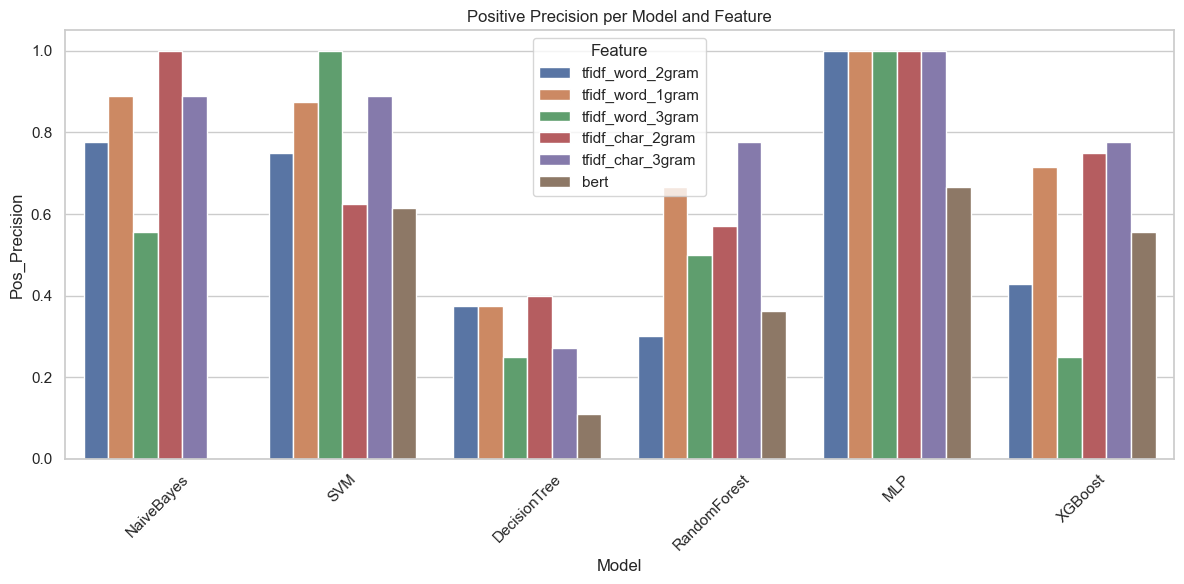

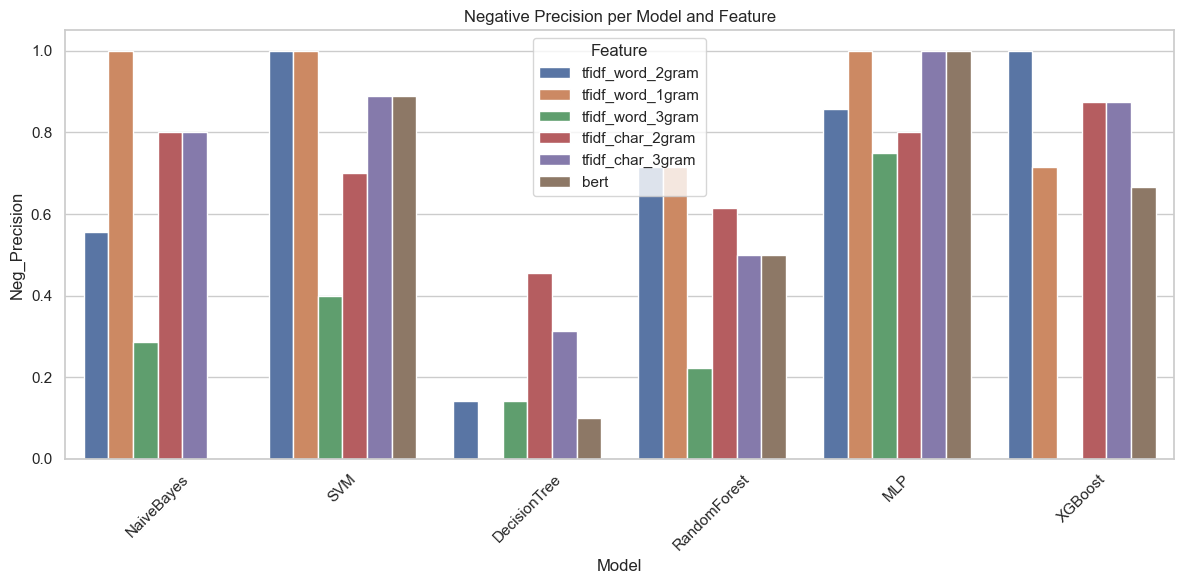

In [7]:
# Positive precision
plt.figure()
sns.barplot(data=df, x="Model", y="Pos_Precision", hue="Feature")
plt.title("Positive Precision per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/positive_precision.png")
plt.show()

# Negative precision
plt.figure()
sns.barplot(data=df, x="Model", y="Neg_Precision", hue="Feature")
plt.title("Negative Precision per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/negative_precision.png")
plt.show()


# 4. Per-Class Recall

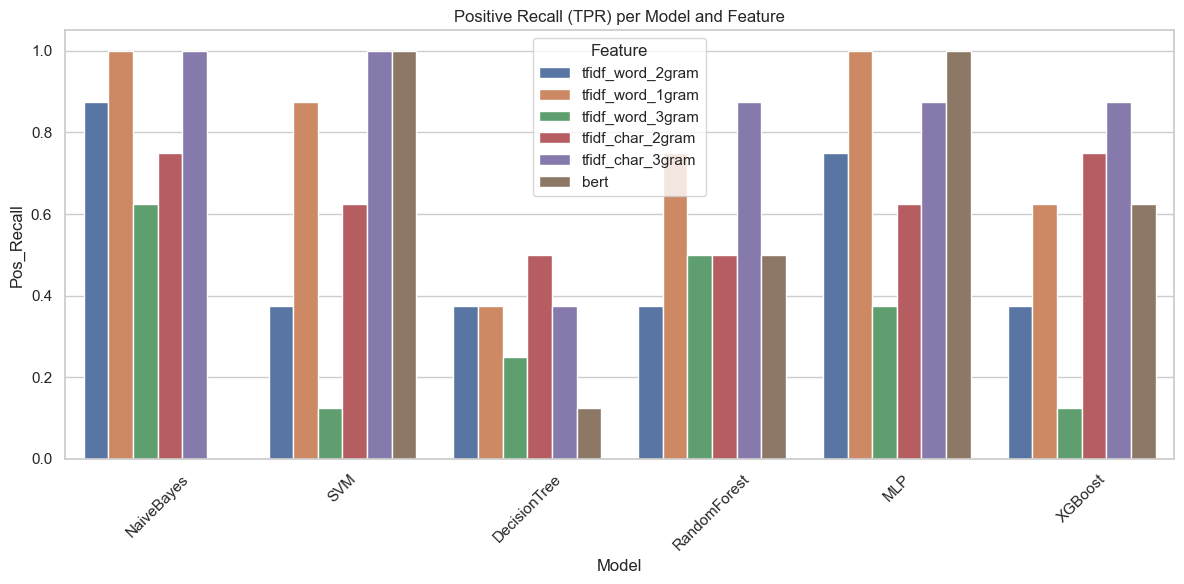

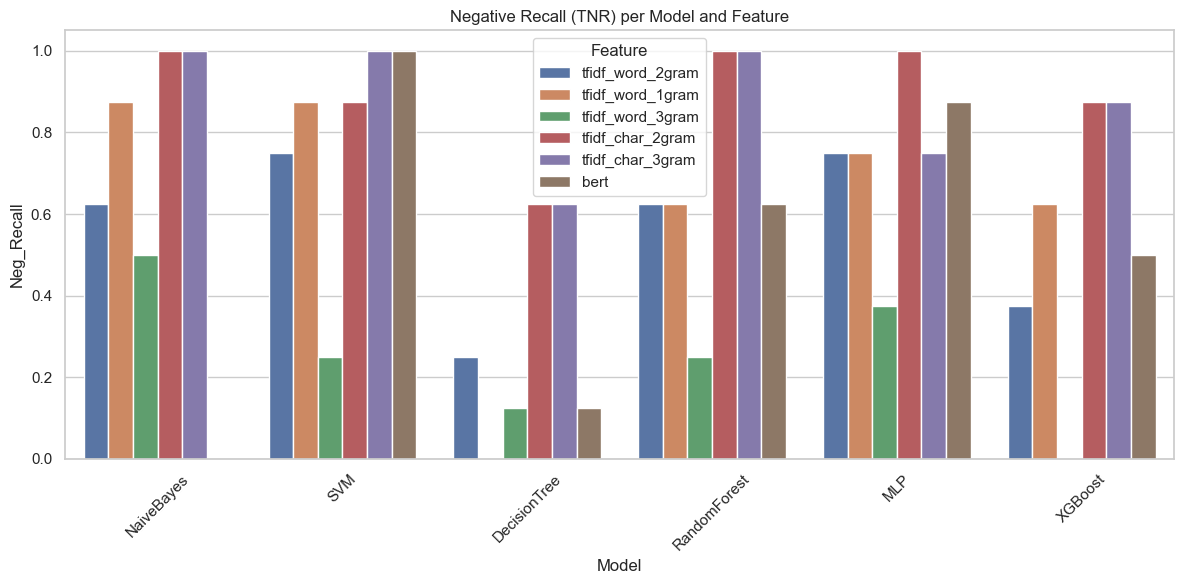

In [8]:
# Positive recall
plt.figure()
sns.barplot(data=df, x="Model", y="Pos_Recall", hue="Feature")
plt.title("Positive Recall (TPR) per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/positive_recall.png")
plt.show()

# Negative recall
plt.figure()
sns.barplot(data=df, x="Model", y="Neg_Recall", hue="Feature")
plt.title("Negative Recall (TNR) per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/negative_recall.png")
plt.show()


# 5. Per-Class F1-Score

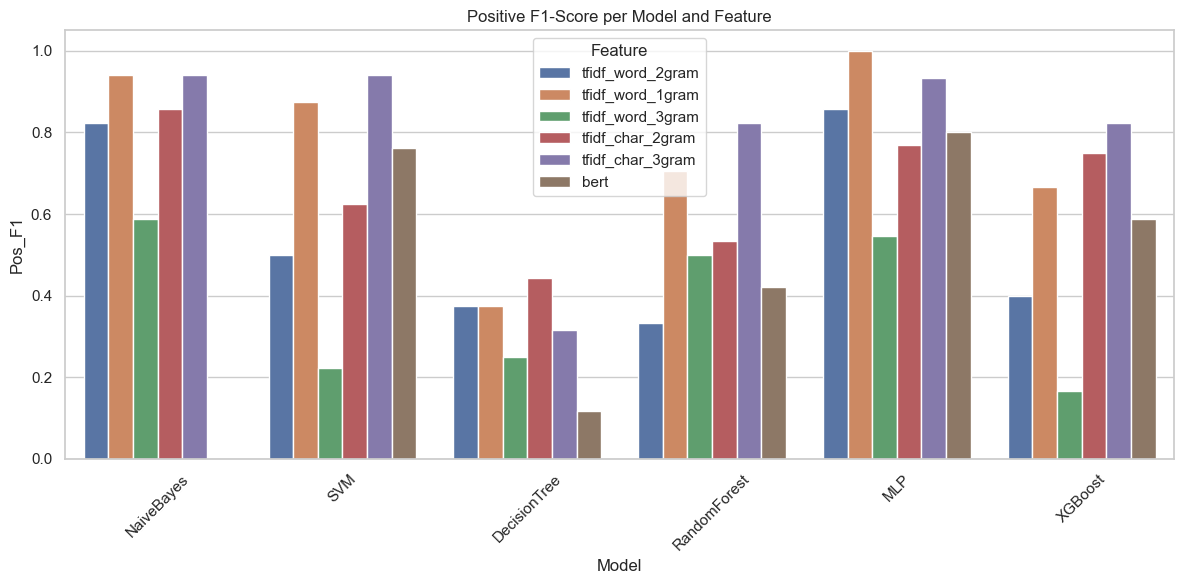

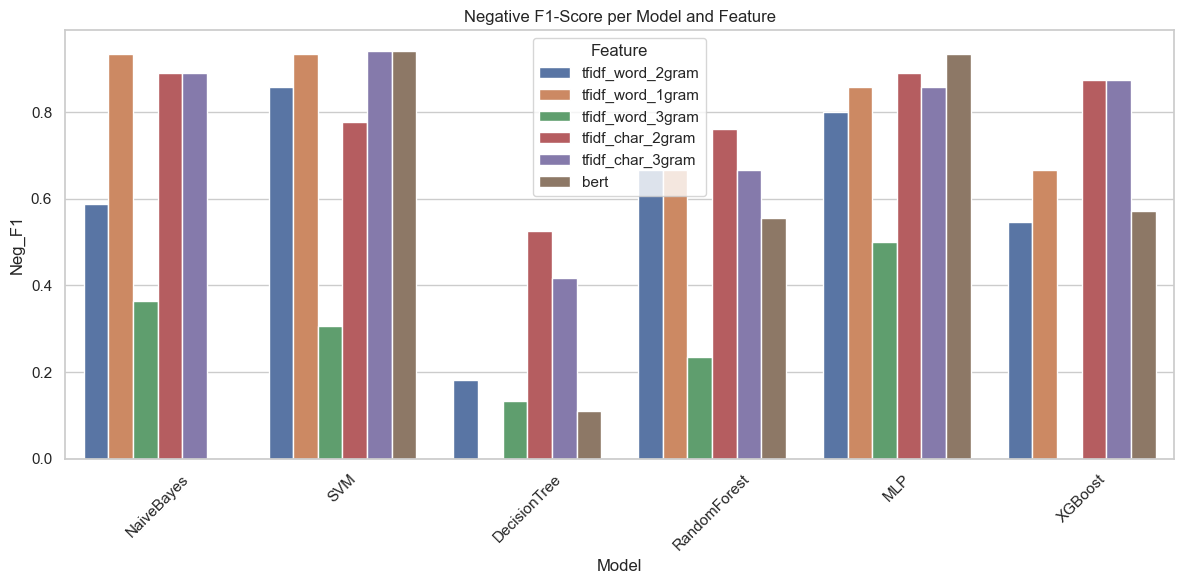

In [9]:
# Positive F1
plt.figure()
sns.barplot(data=df, x="Model", y="Pos_F1", hue="Feature")
plt.title("Positive F1-Score per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/positive_f1.png")
plt.show()

# Negative F1
plt.figure()
sns.barplot(data=df, x="Model", y="Neg_F1", hue="Feature")
plt.title("Negative F1-Score per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/negative_f1.png")
plt.show()


# 6. Summary Tables: Average per-class performance per model

In [10]:
# Compute average per-class metrics
summary = df.groupby("Model")[[
    "Pos_Precision", "Neg_Precision",
    "Pos_Recall", "Neg_Recall",
    "Pos_F1", "Neg_F1",
    "Accuracy", "ErrorRate", "Weighted_F1"
]].mean().round(3)

# Show and save
summary.style.set_caption("Average Per-Class Metrics per Model").background_gradient(cmap="YlGnBu")
summary.to_csv(os.path.join(REPORTS_PATH, "per_class_model_summary.csv"))


# 7. Precision/Recall Balance Check

In [11]:
# Measure balance between positive and negative values
df["Precision_Diff"] = abs(df["Pos_Precision"] - df["Neg_Precision"])
df["Recall_Diff"] = abs(df["Pos_Recall"] - df["Neg_Recall"])

balance_df = df.groupby("Model")[["Precision_Diff", "Recall_Diff"]].mean().round(3)

# Display balance
balance_df.style.set_caption("Balance between Positive and Negative Precision/Recall").background_gradient(cmap="coolwarm")
balance_df.to_csv(os.path.join(REPORTS_PATH, "precision_recall_balance.csv"))
